In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

colors = ['blue', 'red']

In [3]:
df = pd.read_csv('dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## EDA

In [4]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100, 2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


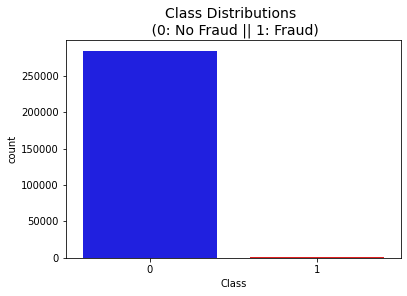

In [5]:
sns.countplot('Class', data=df, palette=['blue','red'])
_ = plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

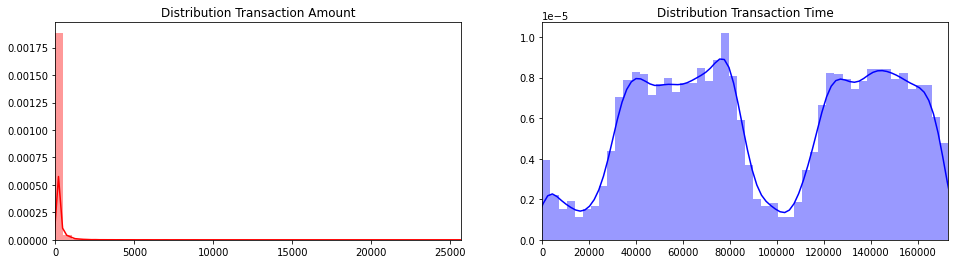

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(16,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='red')
_ = ax[0].set(title = 'Distribution Transaction Amount', xlim = ([min(amount_val), max(amount_val)]))

sns.distplot(time_val, ax=ax[1], color='blue')
_= ax[1].set(title = 'Distribution Transaction Time', xlim = ([min(time_val), max(time_val)]))

In [7]:
df.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0


## Scaling 

In [8]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df = df.drop(['Time','Amount'], axis=1)

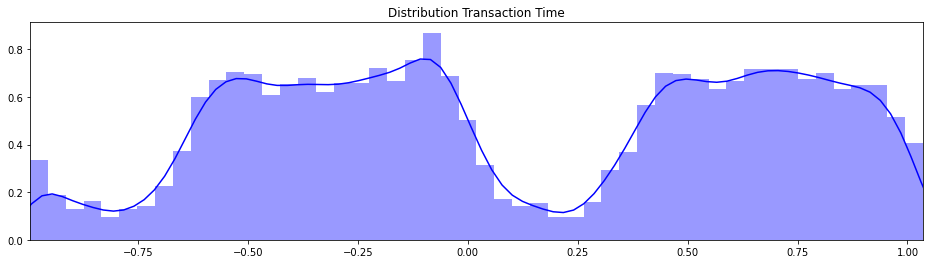

In [9]:
fig, ax = plt.subplots(figsize=(16,4))
time_val = df['scaled_time'].values
sns.distplot(time_val, ax=ax, color='blue')
_= ax.set(title = 'Distribution Transaction Time', xlim = ([min(time_val), max(time_val)]))

## Splitting the Data

In [10]:
from helper_functions.preprocessing import stratifief_split

X_train : (227845, 30) ,y_train shape: (227845,),                    X_test shape: (56962, 30), y_test shape: (56962,)
X_train : (227845, 30) ,y_train shape: (227845,),                    X_test shape: (56962, 30), y_test shape: (56962,)
X_train : (227846, 30) ,y_train shape: (227846,),                    X_test shape: (56961, 30), y_test shape: (56961,)
X_train : (227846, 30) ,y_train shape: (227846,),                    X_test shape: (56961, 30), y_test shape: (56961,)
X_train : (227846, 30) ,y_train shape: (227846,),                    X_test shape: (56961, 30), y_test shape: (56961,)


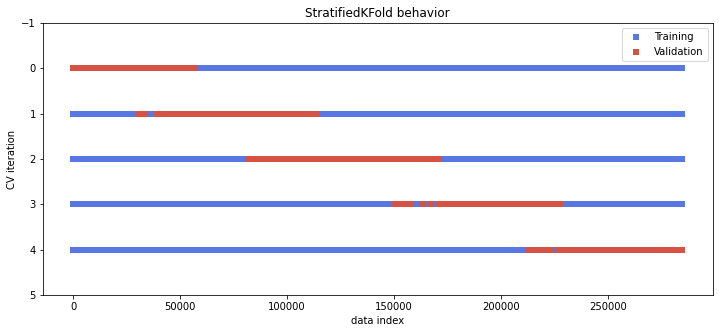

In [11]:
skf, X, y, X_train, y_train, X_test, y_test, train_index, test_index = stratifief_split(df=df, target_column='Class', splits = 5, 
                 plot_tscv=True)

In [12]:
# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


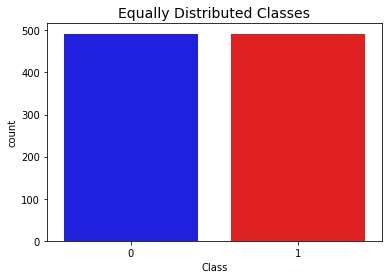

In [105]:
# shuffle data before creating the subsamples
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette=['blue', 'red'])
_ = plt.title('Equally Distributed Classes', fontsize=14)

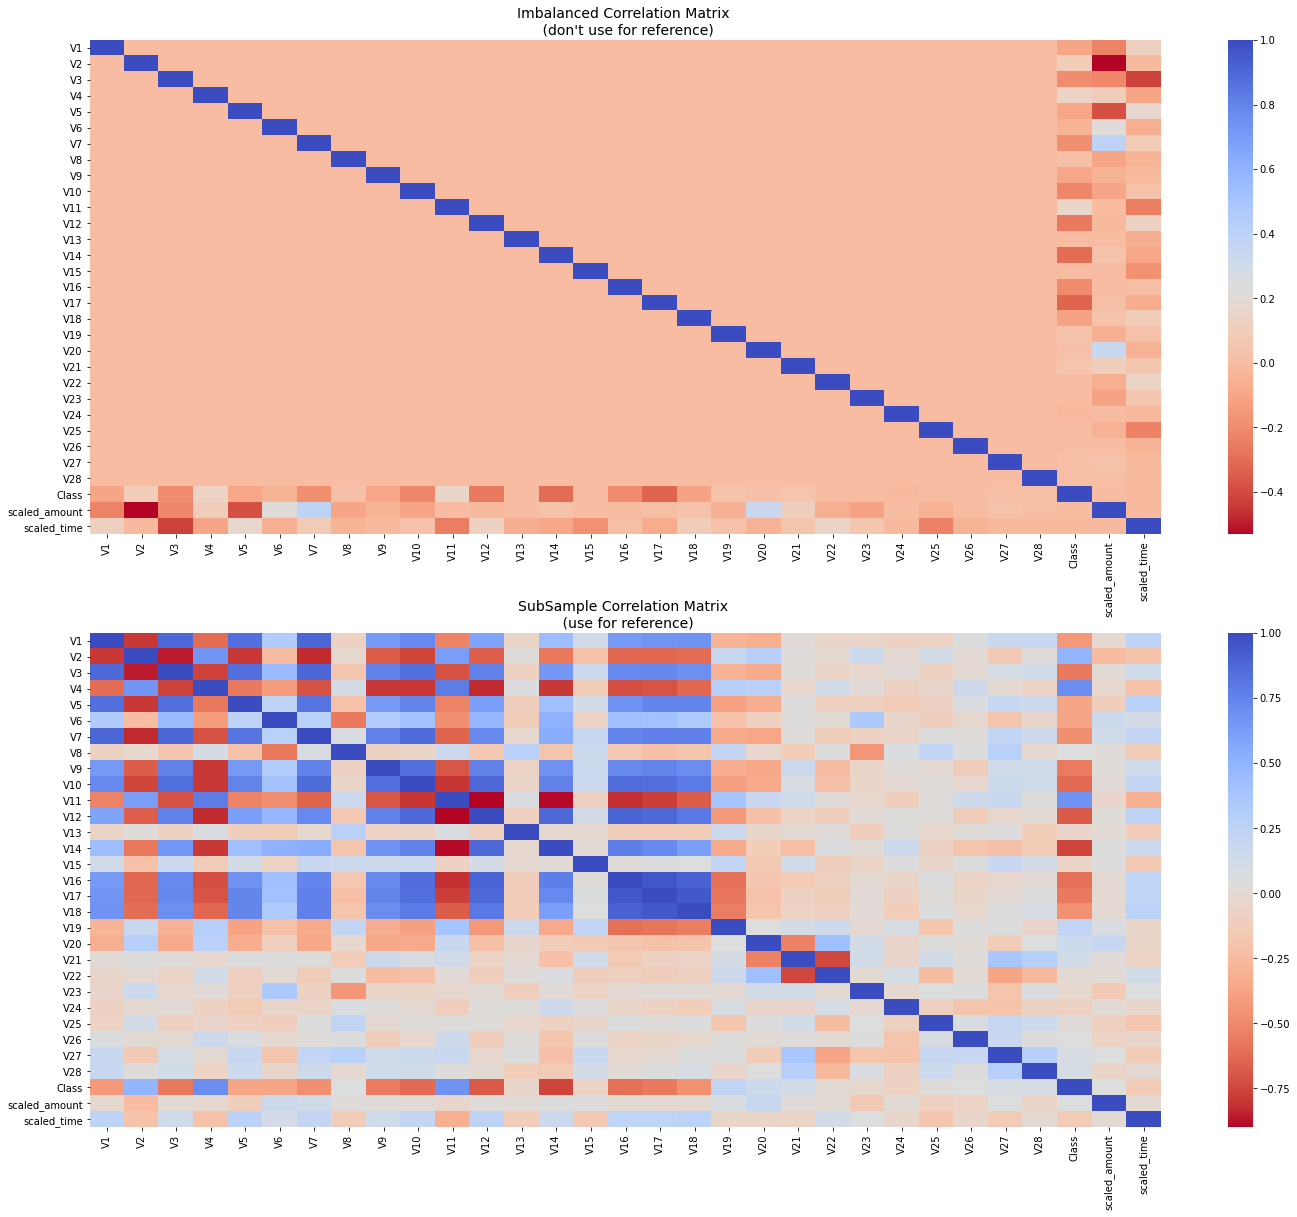

In [15]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

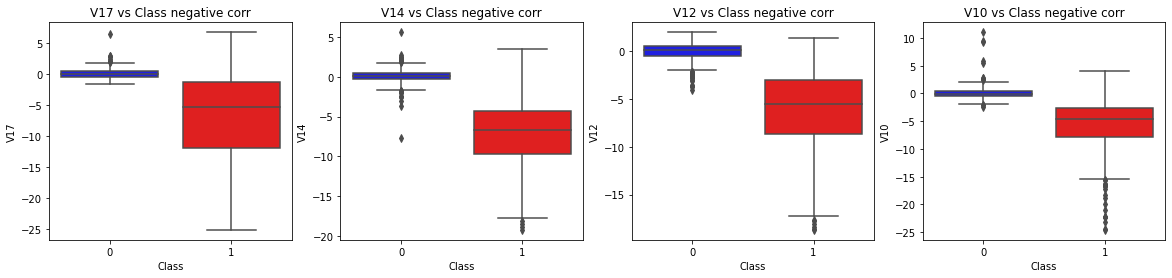

In [16]:
neg_y = ['V17', 'V14', 'V12', 'V10']
f, ax = plt.subplots(1,4, figsize=(20,4))
for i, y_ in enumerate(neg_y):
    sns.boxplot(x='Class', y=y_, data=new_df, palette=colors, ax=ax[i])
    ax[i].set(title = f"{y_} vs Class negative corr")

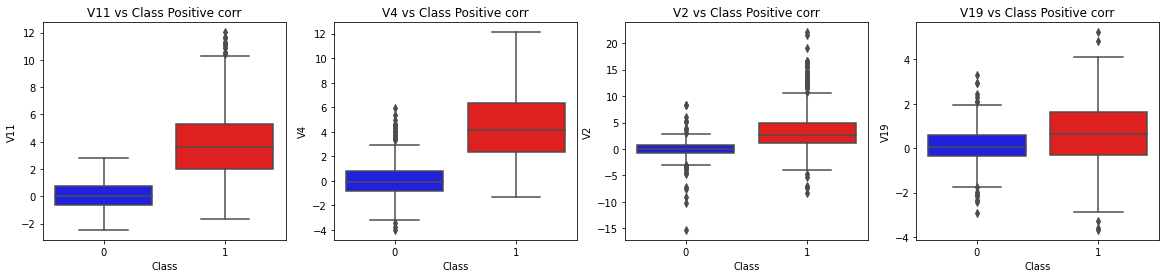

In [17]:
pos_y = ['V11', 'V4', 'V2', 'V19']
f, ax = plt.subplots(1,4, figsize=(20,4))
for i, y_ in enumerate(pos_y):
    sns.boxplot(x='Class', y=y_, data=new_df, palette=colors, ax=ax[i])
    ax[i].set(title = f"{y_} vs Class Positive corr")

## Anomaly Detection

remove "extreme outliers" from features that have a high correlation with our classes

 - Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. 
 - Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
 - Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
 
 - Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

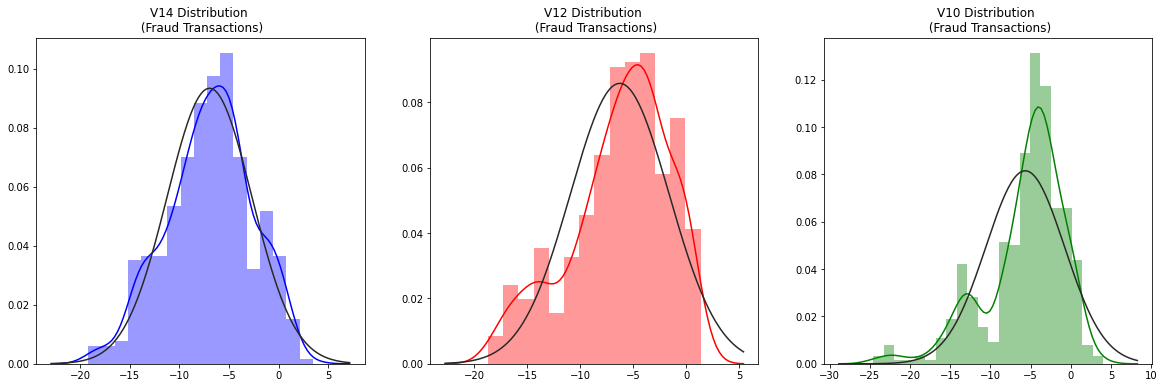

In [106]:
from scipy.stats import norm
f, ax = plt.subplots(1,3, figsize=(20, 6))
f_list = ['V14', 'V12', 'V10']
colors = ['blue', 'red', 'green']

for i, f in enumerate(f_list):
    fraud_dist = new_df[f].loc[new_df['Class'] == 1].values
    sns.distplot(fraud_dist,ax=ax[i], fit=norm, color=colors[i])
    ax[i].set(title = f'{f} Distribution \n (Fraud Transactions)')

In [107]:
from helper_functions.outlier import outliers_iqr
outlier_indices = []

for f in f_list:
    indices = outliers_iqr(new_df[f].loc[new_df['Class']==1])
    indices = [item for sublist in np.asarray(indices).tolist() for item in sublist]
    outlier_indices.append(indices)
outlier_indices = [item for sublist in outlier_indices for item in sublist]

In [113]:
new_df = new_df.drop(new_df.iloc[outlier_indices].index)

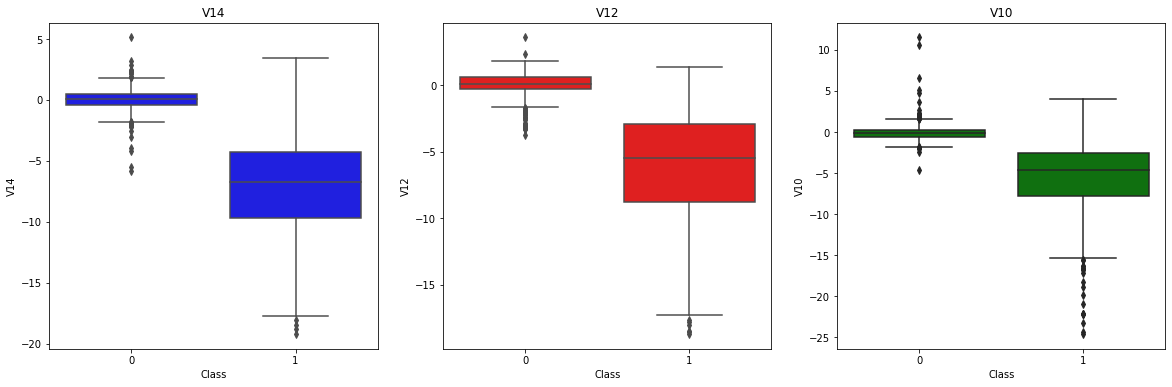

In [114]:
f, ax = plt.subplots(1,3, figsize=(20, 6))
for i, f in enumerate(f_list):
    sns.boxplot(x='Class', y=f, data=new_df, color=colors[i], ax=ax[i])
    ax[i].set(title=f"{f}")

## T-SNE

In [143]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)

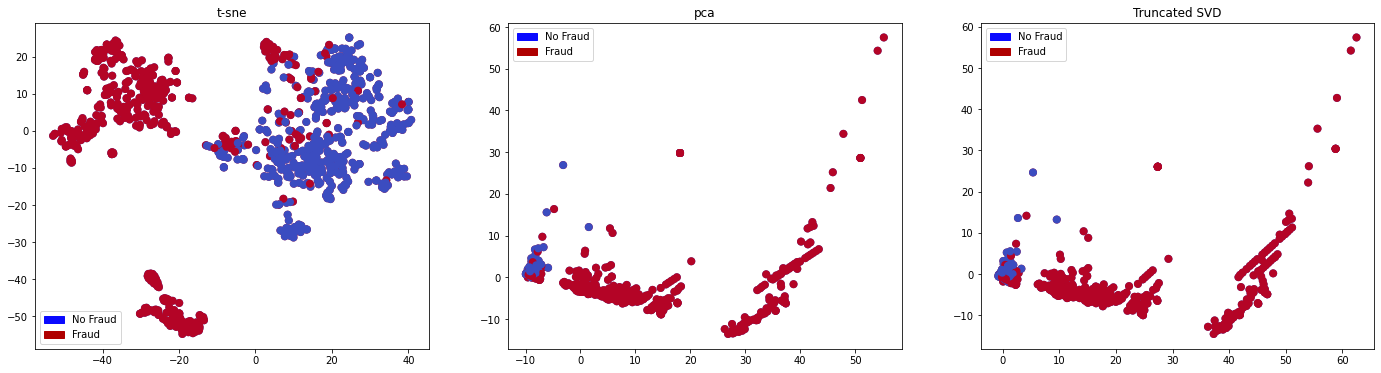

In [144]:
f, ax = plt.subplots(1, 3, figsize=(24,6))

titles = ['t-sne', 'pca', 'Truncated SVD']
data_list = [X_reduced_tsne, X_reduced_pca, X_reduced_svd]

for i, d in enumerate(data_list):
    ax[i].scatter(d[:,0], d[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
    ax[i].scatter(d[:,0], d[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
    ax[i].set(title = f'{titles[i]}')
    ax[i].legend(handles=[blue_patch, red_patch])

X_train : (765, 30) ,y_train shape: (765,),                    X_test shape: (192, 30), y_test shape: (192,)
X_train : (765, 30) ,y_train shape: (765,),                    X_test shape: (192, 30), y_test shape: (192,)
X_train : (766, 30) ,y_train shape: (766,),                    X_test shape: (191, 30), y_test shape: (191,)
X_train : (766, 30) ,y_train shape: (766,),                    X_test shape: (191, 30), y_test shape: (191,)
X_train : (766, 30) ,y_train shape: (766,),                    X_test shape: (191, 30), y_test shape: (191,)


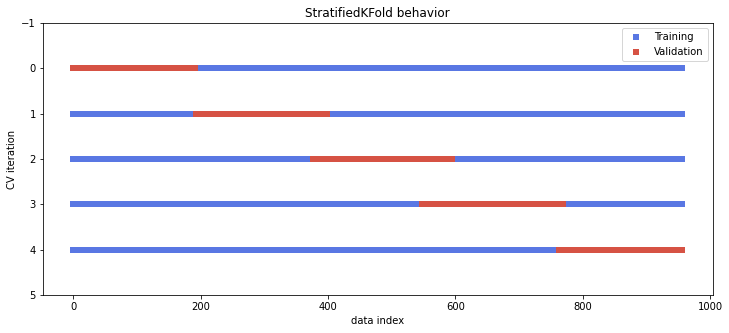

In [145]:
skf, X, y, X_train, y_train, X_test, y_test, train_index, test_index = stratifief_split(df=new_df, target_column='Class', splits = 5, 
                 plot_tscv=True)

In [152]:
from sklearn.model_selection import cross_val_score

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}


for key, clf in classifiers.items():
    clf.fit(X_train, y_train)
    training_score = cross_val_score(clf, X_train, y_train, cv=5)
    print("Classifiers: ", clf.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 93.0 % accuracy score


In [156]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_


svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [157]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.78%
Knears Neighbors Cross Validation Score 94.39%
Support Vector Classifier Cross Validation Score 94.78%
DecisionTree Classifier Cross Validation Score 91.77%


In [159]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [160]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9753899432809775
KNears Neighbors:  0.9437854493891799
Support Vector Classifier:  0.9725267233856895
Decision Tree Classifier:  0.9177028795811518


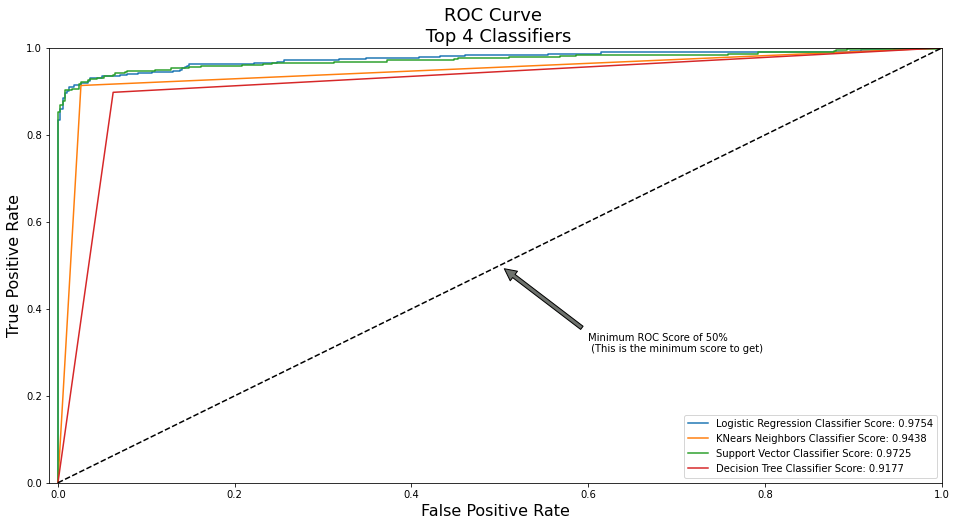

In [161]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

## SMOTE

Synthetic Minority Over-sampling Technique, creates new synthetic points in order to have an equal class balance.

 - Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
 - Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
 - Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
 - Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

Wrong way to under/oversample

![wrong](img/cv_undersample_wrong.png)


Right way:

![right](img/cv_undersample_right.png)


SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.

In [168]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print(f'Length of X (train): {X_train} | Length of y (train): {y_train}')
print(f'Length of X (test): {X_test} | Length of y (test): {y_test}')

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
lr = LogisticRegression()


rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in skf.split(X_train, y_train):
    # SMOTE happens during Cross Validation not before..!!!!!!
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) 
    model = pipeline.fit(X_train[train], y_train[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train[test])
    
    accuracy_lst.append(pipeline.score(X_train[test], y_train[test]))
    precision_lst.append(precision_score(y_train[test], prediction))
    recall_lst.append(recall_score(y_train[test], prediction))
    f1_lst.append(f1_score(y_train[test], prediction))
    auc_lst.append(roc_auc_score(y_train[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): [[-0.87953426 -0.4890467  -0.18897809 ...  0.08915046 -0.05589324
   0.37892832]
 [-2.40558049  3.73823496 -2.31784304 ... -0.13886626 -0.2097394
   0.07030158]
 [-1.37331619  0.9355747   1.94850596 ... -0.16058585 -0.11374275
  -0.10730859]
 ...
 [-5.23880774  0.62301301 -5.78450659 ... -0.96448242  0.25124013
   0.92210905]
 [-2.0426082   1.57357807 -2.37265243 ...  0.17169651  3.3517781
  -0.36131768]
 [-7.34795495  2.39704135 -7.57235582 ...  0.37818669 -0.29581499
  -0.34161586]] | Length of y (train): [0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 0 1 0 1 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 0 1 0 0 0 0